Number of hyperedges for each day:
2015-10-27: 1
Progress: 1/2547 files processed
2016-02-01: 1
Progress: 2/2547 files processed
2016-02-04: 1
Progress: 3/2547 files processed
2016-02-09: 1
Progress: 4/2547 files processed
2016-02-11: 1
Progress: 5/2547 files processed
2016-02-12: 1
Progress: 6/2547 files processed
2016-02-13: 1
Progress: 7/2547 files processed
2016-02-14: 1
Progress: 8/2547 files processed
2016-02-15: 1
Progress: 9/2547 files processed
2016-02-16: 1
Progress: 10/2547 files processed
2016-02-17: 1
Progress: 11/2547 files processed
2016-02-18: 1
Progress: 12/2547 files processed
2016-02-19: 1
Progress: 13/2547 files processed
2016-02-20: 1
Progress: 14/2547 files processed
2016-02-21: 1
Progress: 15/2547 files processed
2016-02-22: 1
Progress: 16/2547 files processed
2016-02-23: 1
Progress: 17/2547 files processed
2016-02-25: 1
Progress: 18/2547 files processed
2016-02-26: 1
Progress: 19/2547 files processed
2016-02-27: 1
Progress: 20/2547 files processed
2016-02-28: 1


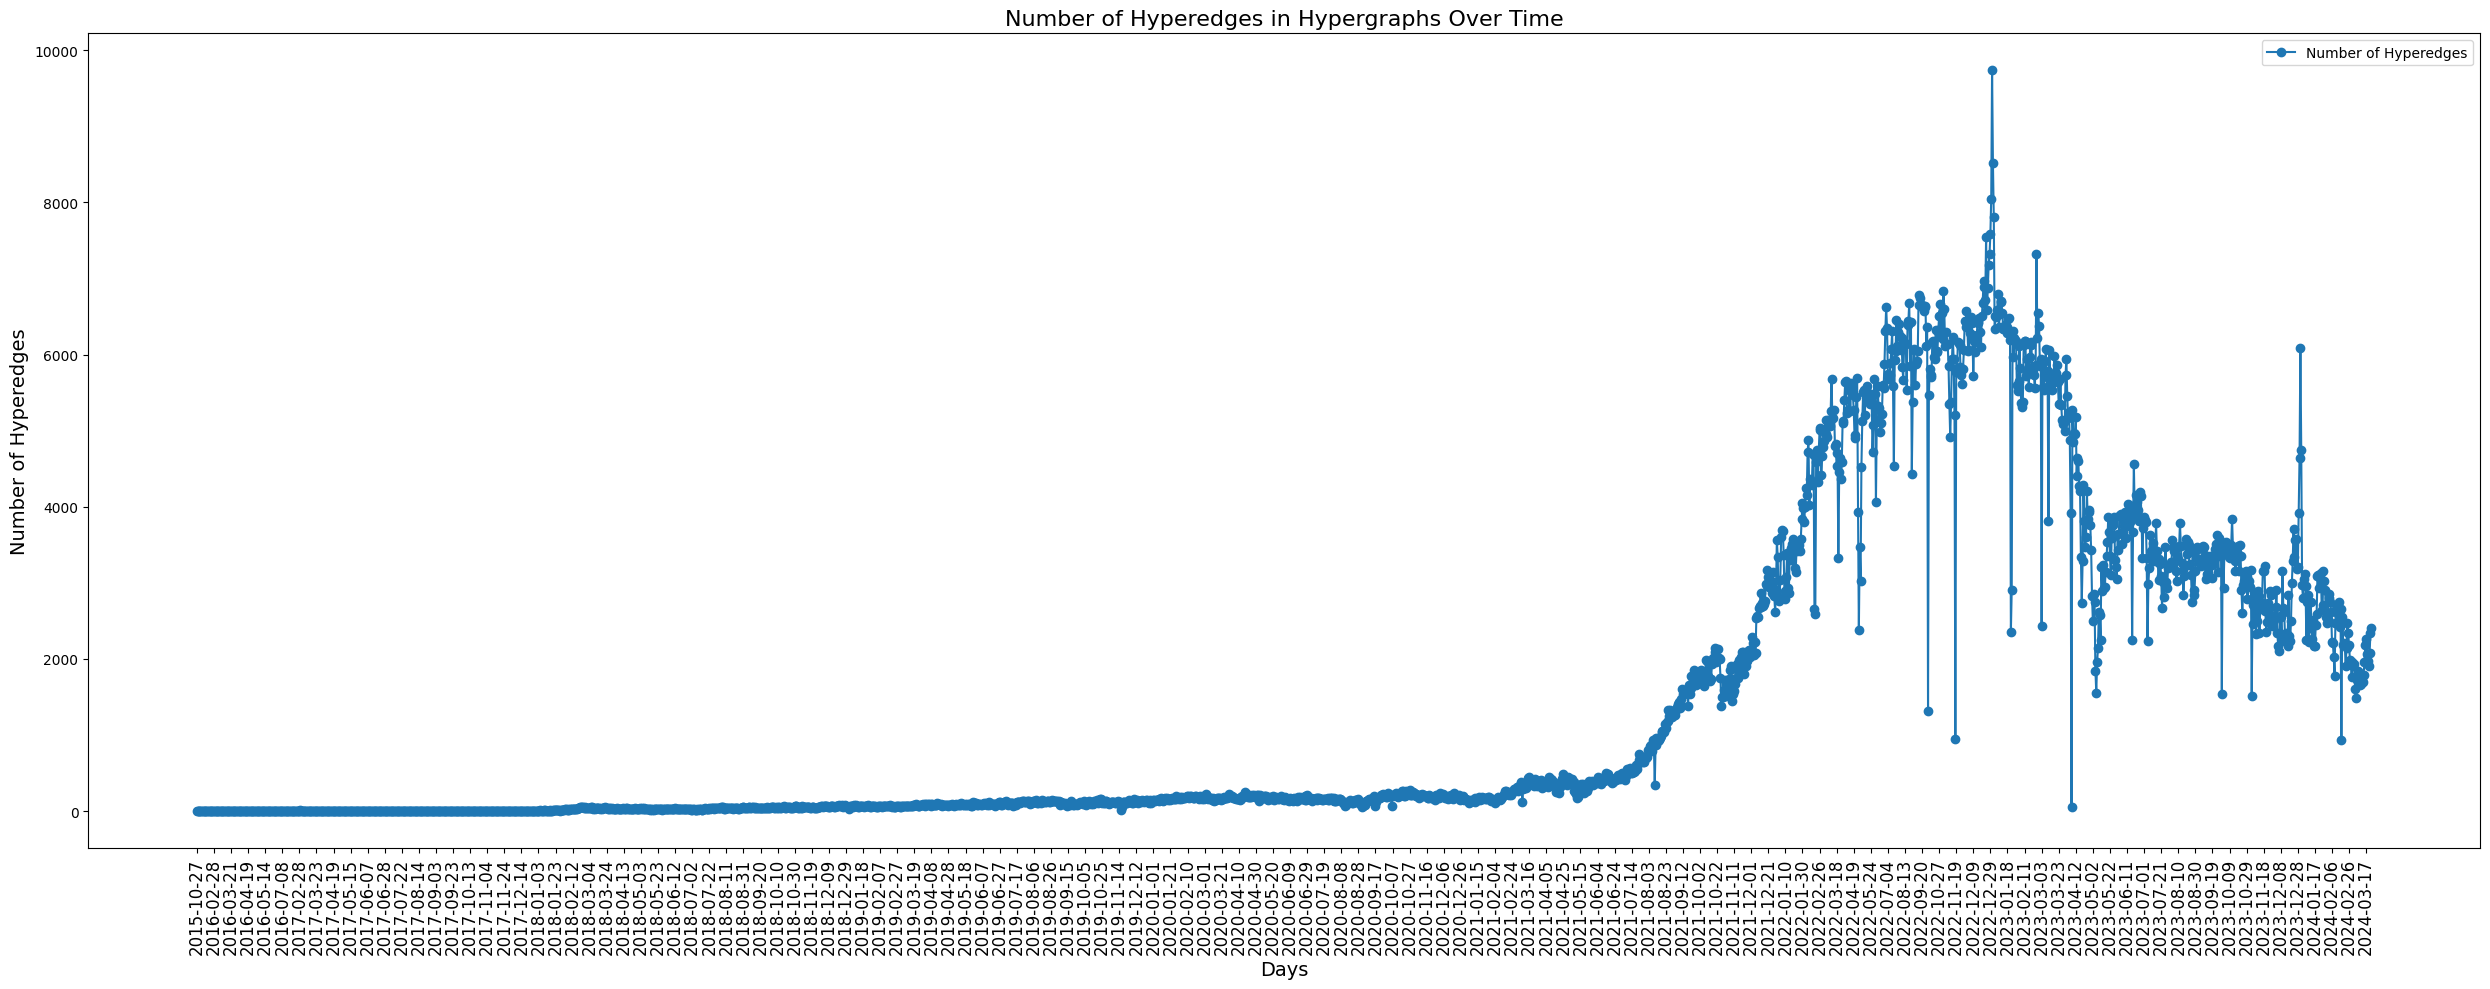

In [1]:
import os
import pandas as pd
import hypernetx as hnx
import matplotlib.pyplot as plt

# Define the input directory for processed files
processed_dir = r'/home/prio/loc_project/Mini_2_ERC_721/labelling_out'

# Initialize a list to store the number of hyperedges for each day
num_hyperedges_per_day = []

print("Number of hyperedges for each day:")

# Process each CSV file in the processed directory
for i, filename in enumerate(sorted(os.listdir(processed_dir)), start=1):
    if filename.endswith('.csv'):
        file_path = os.path.join(processed_dir, filename)
        
        df = pd.read_csv(file_path)
        
        # Initialize a dictionary to store the hyperedges for the current day
        hyperedges = {}
        
        # Group by 'tokenAddressLabel' to create hyperedges
        for token, group in df.groupby('tokenAddressLabel'):
            hyperedges[token] = set(group['fromLabel']).union(set(group['toLabel']))
        
        # Create the hypergraph for the current day
        H = hnx.Hypergraph(hyperedges)
        
        # Get the number of hyperedges in the current hypergraph
        num_hyperedges = len(H.edges)
        edge_name = filename.replace('.csv', '')
        num_hyperedges_per_day.append((edge_name, num_hyperedges))
        
        # Print the number of hyperedges for the current day
        print(f"{edge_name}: {num_hyperedges}")
        
        # Print the progress
        print(f"Progress: {i}/{len(os.listdir(processed_dir))} files processed")

# Sort the number of hyperedges by edge name (which corresponds to the day)
num_hyperedges_per_day.sort()

# Save the data to a CSV file
output_file = r'/home/prio/loc_project/Mini_2_ERC_721/num_tokens_per_day.csv'
hyperedges_df = pd.DataFrame(num_hyperedges_per_day, columns=['Day', 'Number of Hyperedges'])
hyperedges_df.to_csv(output_file, index=False)
print(f"Data saved to {output_file}")

# Extract the days and corresponding number of hyperedges
days = hyperedges_df['Day'].tolist()
num_hyperedges = hyperedges_df['Number of Hyperedges'].tolist()

# Plot the number of hyperedges over time with improved readability
plt.figure(figsize=(25, 10))  # Increase the figure size for better readability
plt.plot(range(len(days)), num_hyperedges, marker='o', linestyle='-', color='#1f77b4', label='Number of Hyperedges')  # Brighter blue color

plt.xlabel('Days', fontsize=14)
plt.ylabel('Number of Hyperedges', fontsize=14)
plt.title('Number of Hyperedges in Hypergraphs Over Time', fontsize=16)

# Selectively label x-axis ticks
selected_indices = list(range(0, len(days), 20))  # Label every 20th day

plt.xticks(
    ticks=selected_indices,  # Set the selected indices
    labels=[days[idx] for idx in selected_indices],  # Set corresponding day names as labels
    fontsize=12,  # Font size for x-tick labels
    rotation=90  # Rotate labels for better readability
)



plt.tight_layout()  # Adjust layout to fit labels

# Optional: Add grid lines for better readability
# plt.grid(True, linestyle='--', alpha=0.7)

plt.grid(False)

# Add a legend
plt.legend()

# Display the plot
plt.show()


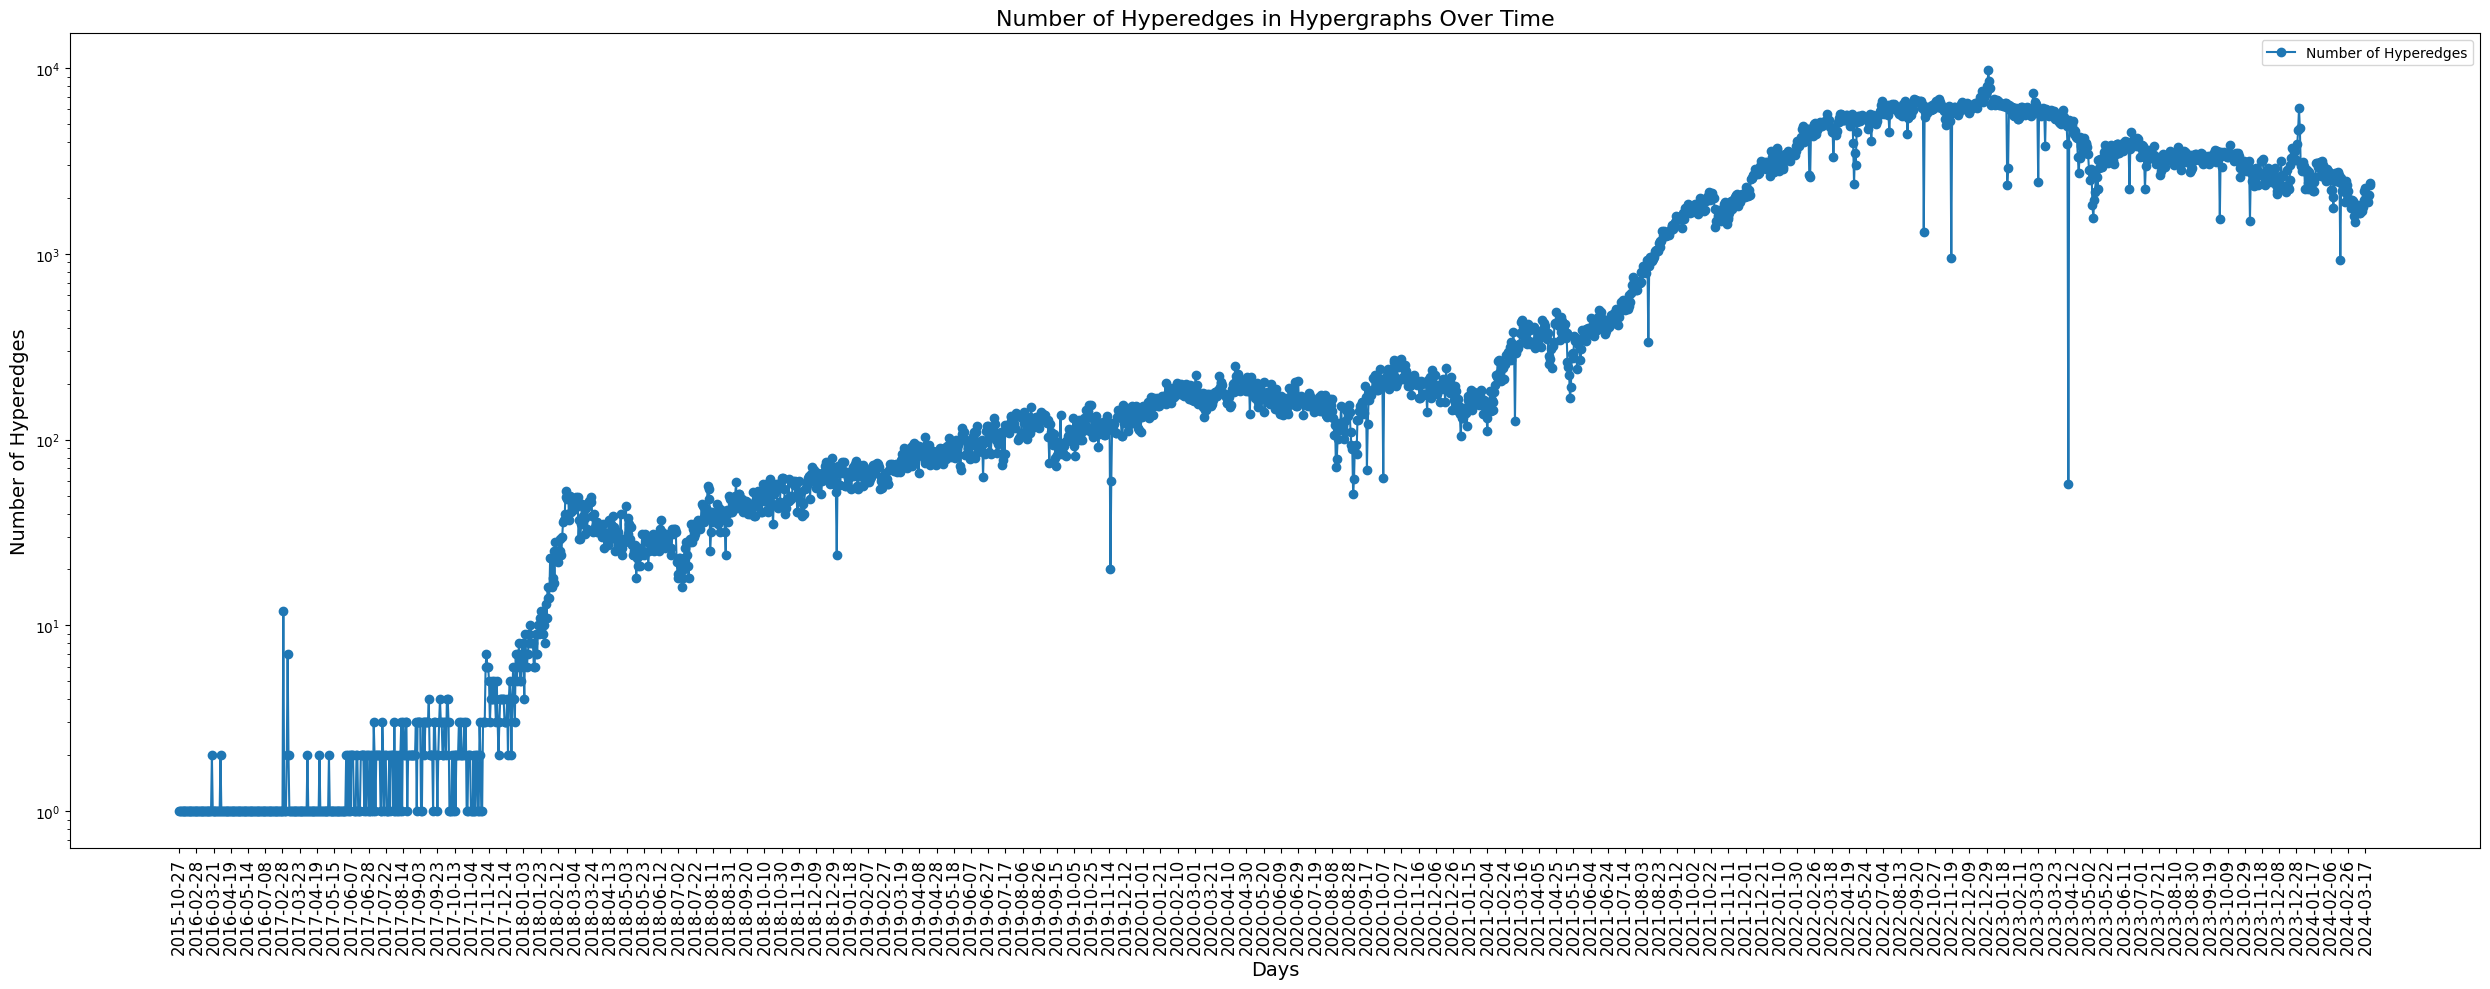

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the CSV file with the number of hyperedges per day
output_file = r'/home/prio/loc_project/Mini_2_ERC_721/num_tokens_per_day.csv'
hyperedges_df = pd.read_csv(output_file)

# Extract the days and corresponding number of hyperedges
days = hyperedges_df['Day'].tolist()
num_hyperedges = hyperedges_df['Number of Hyperedges'].tolist()

# Plot the number of hyperedges over time with improved readability
plt.figure(figsize=(25, 10))  # Increase the figure size for better readability
plt.plot(range(len(days)), num_hyperedges, marker='o', linestyle='-', color='#1f77b4', label='Number of Hyperedges')  # Brighter blue color

plt.xlabel('Days', fontsize=14)
plt.ylabel('Number of Hyperedges', fontsize=14)
plt.title('Number of Hyperedges in Hypergraphs Over Time', fontsize=16)

# Set y-axis to log scale
plt.yscale('log')

# Selectively label x-axis ticks
selected_indices = list(range(0, len(days), 20))  # Label every 20th day

plt.xticks(
    ticks=selected_indices,  # Set the selected indices
    labels=[days[idx] for idx in selected_indices],  # Set corresponding day names as labels
    fontsize=12,  # Font size for x-tick labels
    rotation=90  # Rotate labels for better readability
)

plt.tight_layout()  # Adjust layout to fit labels

# Remove grid lines
plt.grid(False)

# Add a legend
plt.legend()

# Display the plot
plt.show()


### New Tokens 

Number of hyperedges for each day:
2020-06-30: 164
2023-07-18: 3037
2021-01-25: 154
2023-04-30: 3432
2019-03-15: 70
2020-12-01: 182
2018-01-14: 8
2017-10-09: 1
2021-02-02: 142
2018-11-19: 60
2019-07-24: 134
2021-07-06: 412
2021-01-26: 172
2017-08-27: 2
2022-04-15: 5254
2022-11-02: 6598
2023-04-17: 4208
2018-12-24: 76
2018-07-31: 44
2017-11-08: 1
2019-12-17: 122
2018-04-30: 28
2020-04-03: 179
2017-12-20: 2
2023-09-03: 3317
2019-06-24: 98
2017-07-23: 1
2020-11-29: 217
2018-08-07: 48
2021-06-18: 444
2017-03-29: 1
2021-01-24: 166
2016-02-22: 1
2021-02-17: 270
2018-05-19: 24
2017-05-03: 1
2023-07-30: 3228
2019-06-08: 94
2019-04-27: 73
2017-10-30: 1
2018-12-25: 58
2016-05-19: 1
2023-09-17: 3297
2019-08-30: 137
2021-12-03: 2214
2019-04-18: 85
2018-02-06: 18
2024-03-08: 1838
2021-06-13: 459
2017-11-24: 5
2023-11-27: 2554
2019-10-21: 142
2018-06-08: 31
2020-07-11: 151
2023-03-18: 5982
2020-04-30: 182
2018-06-28: 33
2018-12-14: 63
2018-04-03: 31
2021-03-11: 320
2020-06-28: 152
2019-07-11: 106
20

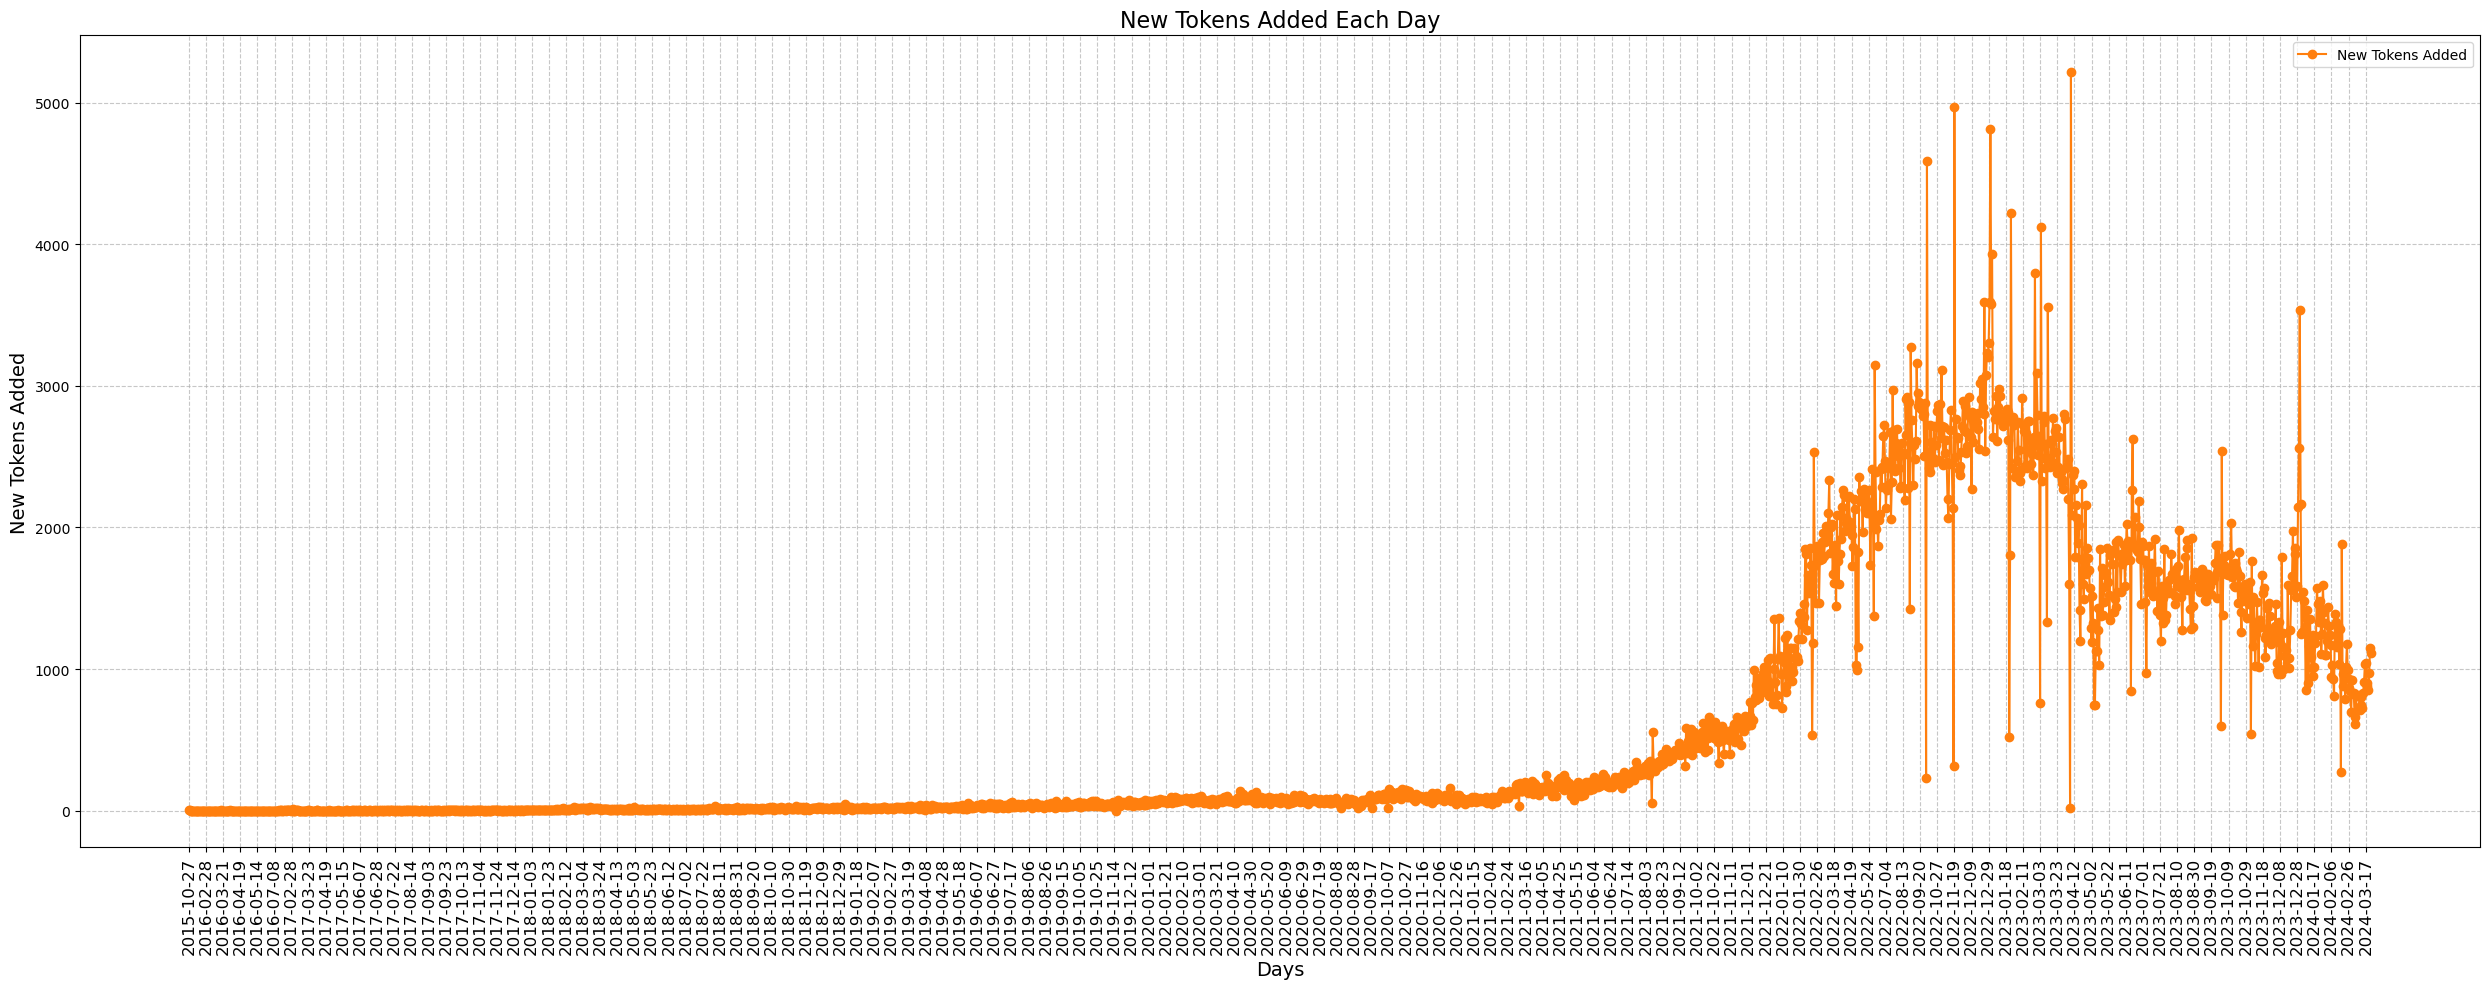

In [1]:
import os
import pandas as pd
import hypernetx as hnx
import matplotlib.pyplot as plt

# Define the input directory for processed files and output file paths
processed_dir = r'/home/prio/loc_project/Mini_2_ERC_721/labelling_out'
output_file_hyperedges = r'/home/prio/loc_project/Mini_2_ERC_721/hyperedges_per_day.csv'
output_file_tokens = r'/home/prio/loc_project/Mini_2_ERC_721/new_tokens_per_day.csv'

# Initialize lists to store the number of hyperedges and tokens for each day
num_hyperedges_per_day = []
tokens_per_day = []

print("Number of hyperedges for each day:")
# Process each CSV file in the processed directory
for filename in os.listdir(processed_dir):
    if filename.endswith('.csv'):
        file_path = os.path.join(processed_dir, filename)
        
        df = pd.read_csv(file_path)
        
        # Initialize a dictionary to store the hyperedges for the current day
        hyperedges = {}
        
        # Group by 'tokenAddressLabel' to create hyperedges
        for token, group in df.groupby('tokenAddressLabel'):
            hyperedges[token] = set(group['fromLabel']).union(set(group['toLabel']))
        
        # Create the hypergraph for the current day
        H = hnx.Hypergraph(hyperedges)
        
        # Get the number of hyperedges in the current hypergraph
        num_hyperedges = len(H.edges)
        edge_name = filename.replace('.csv', '')
        num_hyperedges_per_day.append((edge_name, num_hyperedges))
        
        # Track tokens
        tokens = set(df['tokenAddressLabel'])
        tokens_per_day.append((edge_name, tokens))
        
        # Print the number of hyperedges for the current day
        print(f"{edge_name}: {num_hyperedges}")

# Sort the number of hyperedges by edge name (which corresponds to the day)
num_hyperedges_per_day.sort()
tokens_per_day.sort()

# Extract the days and corresponding number of hyperedges
days = [day for day, _ in num_hyperedges_per_day]
num_hyperedges = [hyperedges for _, hyperedges in num_hyperedges_per_day]

# Calculate new tokens each day
new_tokens_per_day = [len(tokens_per_day[0][1])]  # First day tokens
for i in range(1, len(tokens_per_day)):
    new_tokens = len(tokens_per_day[i][1] - tokens_per_day[i-1][1])
    new_tokens_per_day.append(new_tokens)

# Save the number of hyperedges and new tokens to CSV files
hyperedges_df = pd.DataFrame(num_hyperedges_per_day, columns=['Day', 'Number of Hyperedges'])
tokens_df = pd.DataFrame(list(zip(days, new_tokens_per_day)), columns=['Day', 'New Tokens Added'])

hyperedges_df.to_csv(output_file_hyperedges, index=False)
tokens_df.to_csv(output_file_tokens, index=False)
print(f"Data saved to {output_file_hyperedges} and {output_file_tokens}")

# Plot the number of new tokens added each day
plt.figure(figsize=(25, 10))
plt.plot(range(len(days)), new_tokens_per_day, marker='o', linestyle='-', color='#ff7f0e', label='New Tokens Added')  # Brighter orange color

plt.xlabel('Days', fontsize=14)
plt.ylabel('New Tokens Added', fontsize=14)
plt.title('New Tokens Added Each Day', fontsize=16)

# Selectively label x-axis ticks
selected_indices = list(range(0, len(days), 20))  # Label every 20th day
plt.xticks(
    ticks=selected_indices,  # Set the selected indices
    labels=[days[idx] for idx in selected_indices],  # Set corresponding day names as labels
    fontsize=12,  # Font size for x-tick labels
    rotation=90  # Rotate labels for better readability
)

plt.tight_layout()  # Adjust layout to fit labels

# Optional: Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Add a legend
plt.legend()

# Display the plot
plt.show()


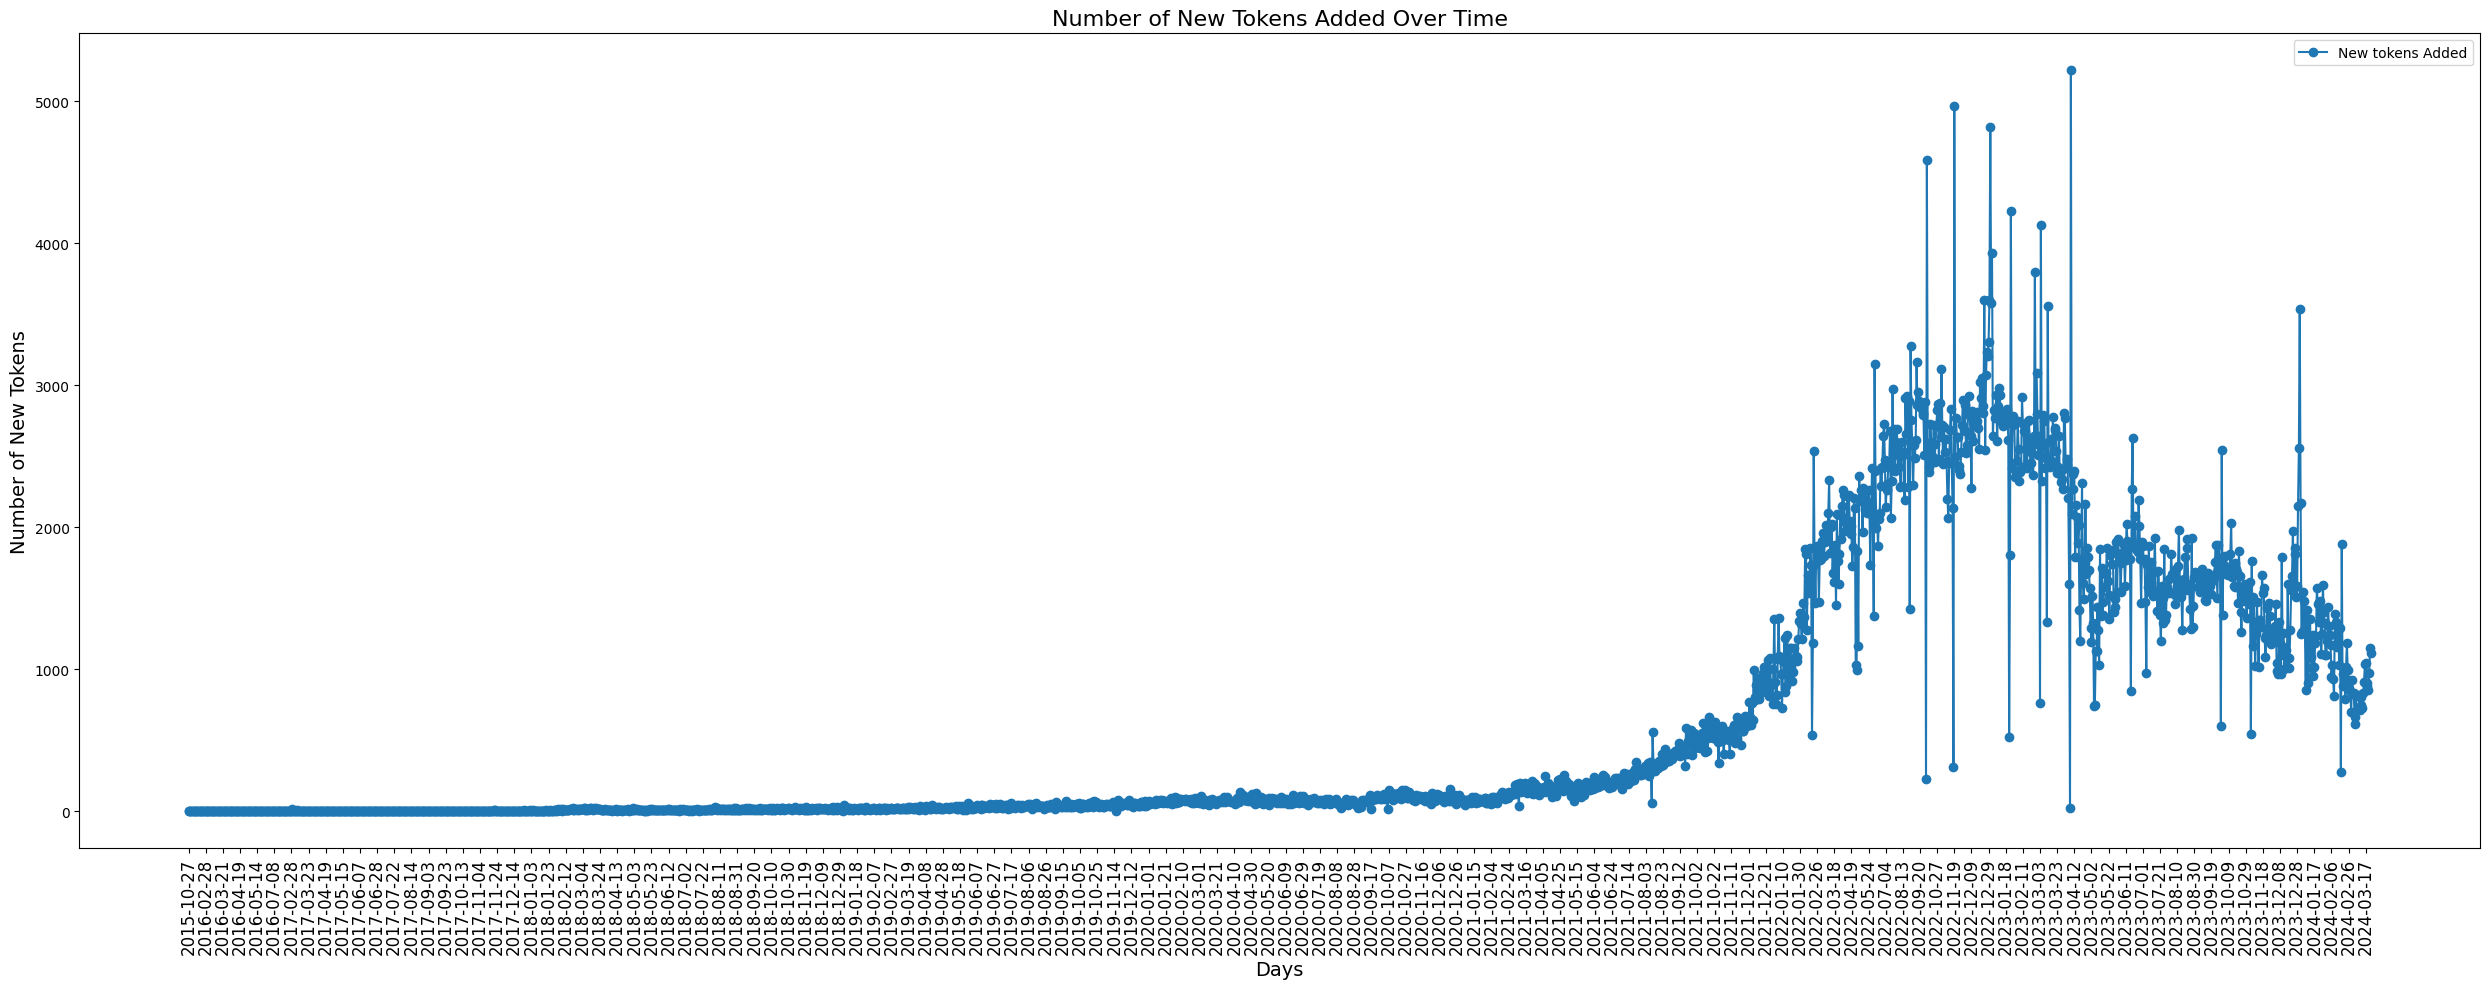

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to your CSV file
csv_file_path = r'/home/prio/loc_project/Mini_2_ERC_721/new_tokens_per_day.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Convert the 'Day' column to a datetime format
df['Day'] = pd.to_datetime(df['Day'], format='%Y-%m-%d')  # Correct format for ISO dates

# Extract the 'Day' and 'Number of New Nodes' columns
days = df['Day']
num_new_nodes = df['New Tokens Added']  # Assuming this column exists in your CSV

# Plot the data with improved readability
plt.figure(figsize=(25, 10))  # Increase the figure size for better readability
plt.plot(range(len(days)), num_new_nodes, marker='o', linestyle='-', color='#1f77b4', label='New tokens Added')

plt.xlabel('Days', fontsize=14)
plt.ylabel('Number of New Tokens', fontsize=14)
plt.title('Number of New Tokens Added Over Time', fontsize=16)

# Selectively label x-axis ticks
selected_indices = list(range(0, len(days), 200))  # Label every 20th day

plt.xticks(
    ticks=selected_indices,  # Set the selected indices
    labels=[days[idx].strftime('%Y-%m-%d') for idx in selected_indices],  # Format the date labels
    fontsize=12,  # Font size for x-tick labels
    rotation=90  # Rotate labels for better readability
)

# Remove grid lines
plt.grid(False)

plt.tight_layout()  # Adjust layout to fit labels

# Add a legend
plt.legend()

# Display the plot
plt.show()


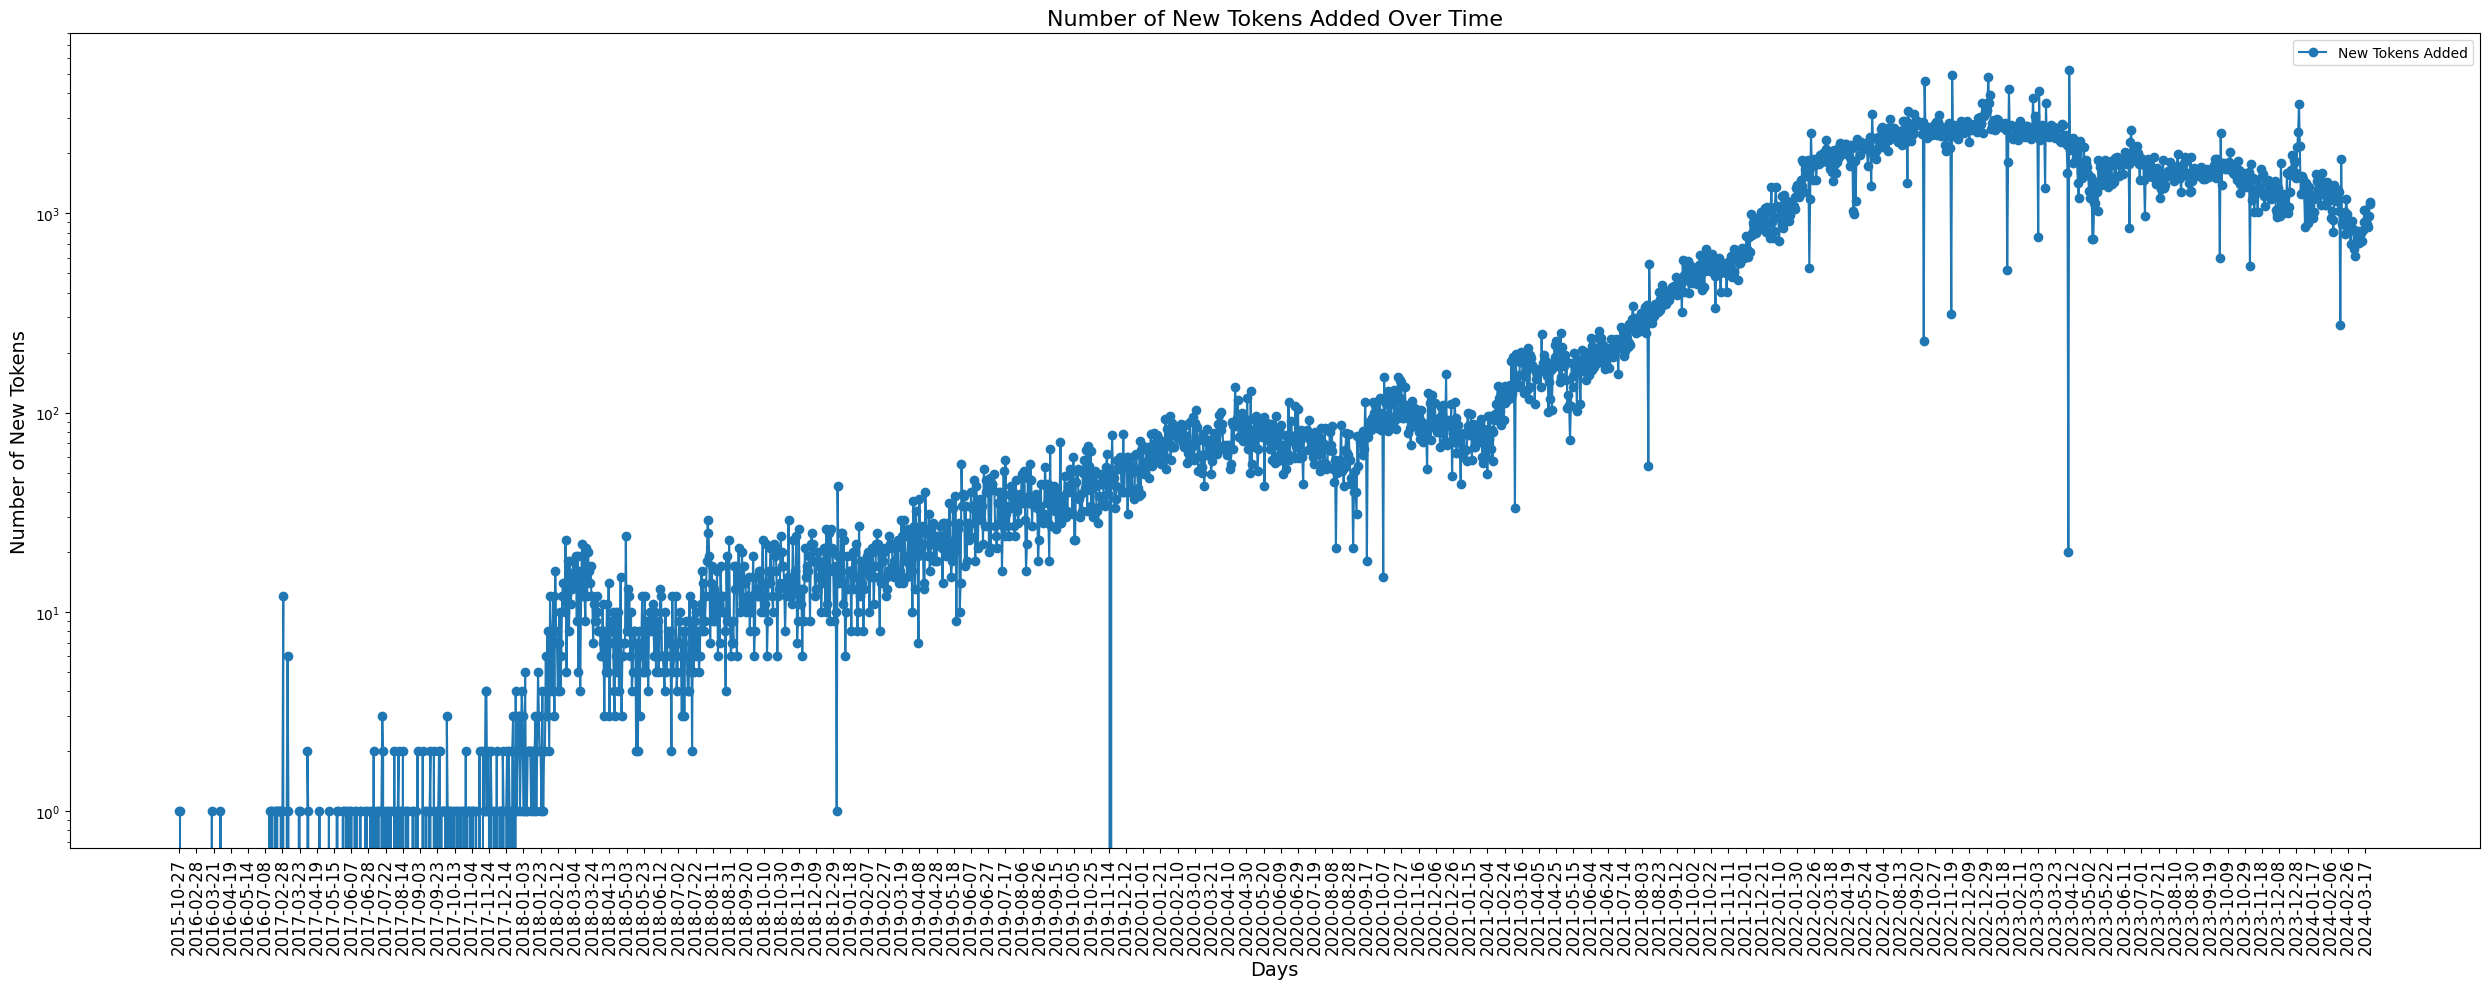

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to your CSV file
csv_file_path = r'/home/prio/loc_project/Mini_2_ERC_721/new_tokens_per_day.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Convert the 'Day' column to a datetime format
df['Day'] = pd.to_datetime(df['Day'], format='%Y-%m-%d')  # Correct format for ISO dates

# Extract the 'Day' and 'Number of New Nodes' columns
days = df['Day']
num_new_nodes = df['New Tokens Added']  # Assuming this column exists in your CSV

# Plot the data with improved readability
plt.figure(figsize=(25, 10))  # Increase the figure size for better readability
plt.plot(range(len(days)), num_new_nodes, marker='o', linestyle='-', color='#1f77b4', label='New Tokens Added')

plt.xlabel('Days', fontsize=14)
plt.ylabel('Number of New Tokens', fontsize=14)
plt.title('Number of New Tokens Added Over Time', fontsize=16)

# Set y-axis to log scale
plt.yscale('log')

# Selectively label x-axis ticks
selected_indices = list(range(0, len(days), 20))  # Label every 20th day

plt.xticks(
    ticks=selected_indices,  # Set the selected indices
    labels=[days[idx].strftime('%Y-%m-%d') for idx in selected_indices],  # Format the date labels
    fontsize=12,  # Font size for x-tick labels
    rotation=90  # Rotate labels for better readability
)

# Remove grid lines
plt.grid(False)

plt.tight_layout()  # Adjust layout to fit labels

# Add a legend
plt.legend()

# Display the plot
plt.show()


### Token results 

Processed 1/2547 files: 2015-10-27 with 1 hyperedges, 1 new hyperedges
Processed 2/2547 files: 2016-02-01 with 1 hyperedges, 1 new hyperedges
Processed 3/2547 files: 2016-02-04 with 1 hyperedges, 0 new hyperedges
Processed 4/2547 files: 2016-02-09 with 1 hyperedges, 0 new hyperedges
Processed 5/2547 files: 2016-02-11 with 1 hyperedges, 0 new hyperedges
Processed 6/2547 files: 2016-02-12 with 1 hyperedges, 0 new hyperedges
Processed 7/2547 files: 2016-02-13 with 1 hyperedges, 0 new hyperedges
Processed 8/2547 files: 2016-02-14 with 1 hyperedges, 0 new hyperedges
Processed 9/2547 files: 2016-02-15 with 1 hyperedges, 0 new hyperedges
Processed 10/2547 files: 2016-02-16 with 1 hyperedges, 0 new hyperedges
Processed 11/2547 files: 2016-02-17 with 1 hyperedges, 0 new hyperedges
Processed 12/2547 files: 2016-02-18 with 1 hyperedges, 0 new hyperedges
Processed 13/2547 files: 2016-02-19 with 1 hyperedges, 0 new hyperedges
Processed 14/2547 files: 2016-02-20 with 1 hyperedges, 0 new hyperedges
P

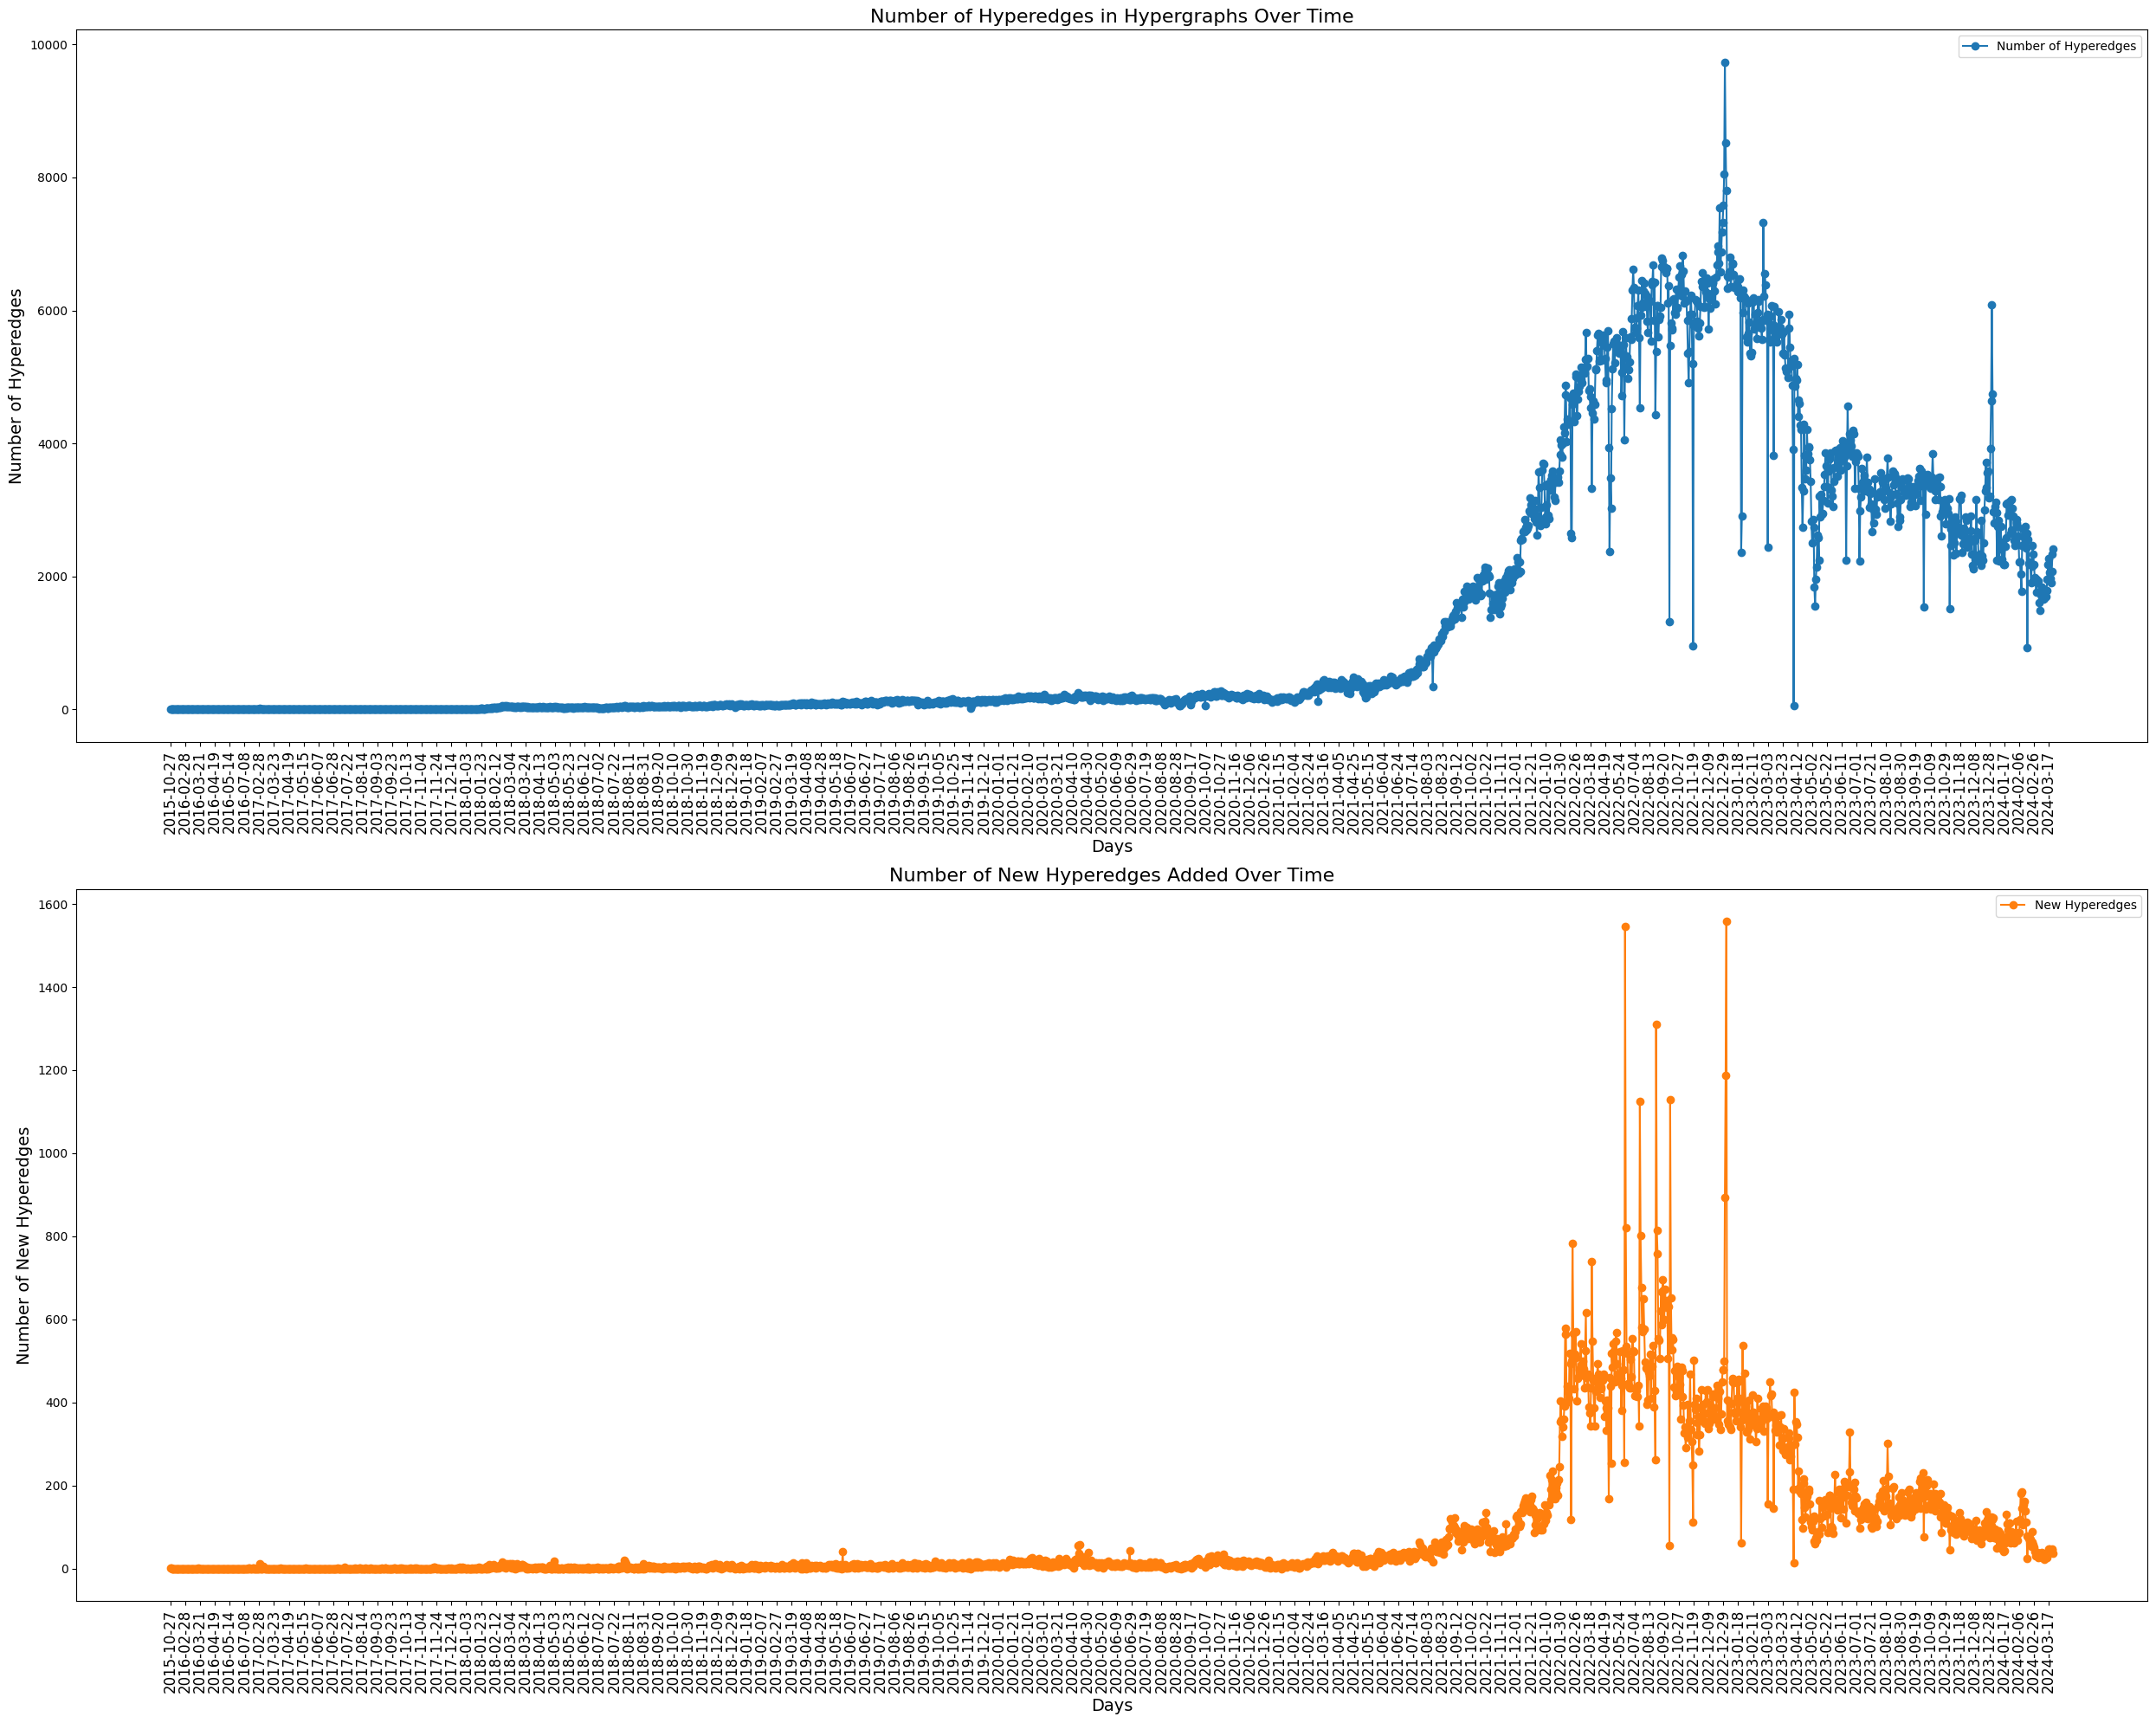

In [4]:
import os
import pandas as pd
import hypernetx as hnx
import matplotlib.pyplot as plt

# Define the input directory for labeled files and output file for storing data
labeled_dir = r'/home/prio/loc_project/Mini_2_ERC_721/labelling_out'
output_file = r'/home/prio/loc_project/Mini_2_ERC_721/token_results.csv'  # CSV file to save the calculated data

# Initialize lists to store the number of hyperedges and the number of new hyperedges for each day
num_hyperedges_per_day = []
new_hyperedges_per_day = []

# Initialize a set to keep track of all hyperedges encountered so far
cumulative_hyperedges = set()

# Process each CSV file in the labeled directory
total_files = len([f for f in os.listdir(labeled_dir) if f.endswith('.csv')])
for idx, filename in enumerate(sorted(os.listdir(labeled_dir))):
    if filename.endswith('.csv'):
        file_path = os.path.join(labeled_dir, filename)
        
        df = pd.read_csv(file_path)
        
        # Initialize a dictionary to store the hyperedges for the current day
        hyperedges = {}
        
        # Group by 'tokenAddressLabel' to create hyperedges
        for token, group in df.groupby('tokenAddressLabel'):
            hyperedges[token] = set(group['fromLabel']).union(set(group['toLabel']))
        
        # Create the hypergraph for the current day
        H = hnx.Hypergraph(hyperedges)
        
        # Get the number of hyperedges in the current hypergraph
        num_hyperedges = len(H.edges)
        edge_name = filename.replace('.csv', '')
        num_hyperedges_per_day.append((edge_name, num_hyperedges))
        
        # Initialize a set to store hyperedges for the current day
        current_day_hyperedges = set(H.edges)
        
        # Calculate new hyperedges by finding the difference between current day's hyperedges and cumulative hyperedges
        new_hyperedges = current_day_hyperedges - cumulative_hyperedges
        
        # Add the new hyperedges to the cumulative set
        cumulative_hyperedges.update(current_day_hyperedges)
        
        # Count the number of new hyperedges
        num_new_hyperedges = len(new_hyperedges)
        new_hyperedges_per_day.append((edge_name, num_new_hyperedges))
        
        # Print progress
        print(f"Processed {idx + 1}/{total_files} files: {edge_name} with {num_hyperedges} hyperedges, {num_new_hyperedges} new hyperedges")

# Save the calculated data to a CSV file
df_results = pd.DataFrame({
    'Day': [day for day, _ in num_hyperedges_per_day],
    'Number_of_Hyperedges': [edges for _, edges in num_hyperedges_per_day],
    'New_Hyperedges': [edges for _, edges in new_hyperedges_per_day]
})
df_results.to_csv(output_file, index=False)

# Load the data for plotting (useful for later without recalculating)
df_loaded = pd.read_csv(output_file)
days = df_loaded['Day']
num_hyperedges = df_loaded['Number_of_Hyperedges']
num_new_hyperedges = df_loaded['New_Hyperedges']

# Plot the number of hyperedges and new hyperedges over time in subplots
plt.figure(figsize=(25, 20))  # Increase the figure size for better readability

# Plot the number of hyperedges
plt.subplot(2, 1, 1)
plt.plot(range(len(days)), num_hyperedges, marker='o', linestyle='-', color='#1f77b4', label='Number of Hyperedges')
plt.xlabel('Days', fontsize=14)
plt.ylabel('Number of Hyperedges', fontsize=14)
plt.title('Number of Hyperedges in Hypergraphs Over Time', fontsize=16)

# Selectively label x-axis ticks
selected_indices = list(range(0, len(days), 20))  # Label every 20th day
plt.xticks(
    ticks=selected_indices,
    labels=[days[idx] for idx in selected_indices],
    fontsize=12,
    rotation=90
)

# # Annotate points (days, num_hyperedges)
# for i, (day, edges) in enumerate(zip(days, num_hyperedges)):
#     if i % 30 == 0:  # Annotate every 30th point for clarity
#         plt.text(i, edges, f'({day}, {edges})', fontsize=10, ha='center', va='bottom', rotation=45, color='red')

plt.tight_layout()
plt.grid(False)
plt.legend()

# Plot the number of new hyperedges
plt.subplot(2, 1, 2)
plt.plot(range(len(days)), num_new_hyperedges, marker='o', linestyle='-', color='#ff7f0e', label='New Hyperedges')
plt.xlabel('Days', fontsize=14)
plt.ylabel('Number of New Hyperedges', fontsize=14)
plt.title('Number of New Hyperedges Added Over Time', fontsize=16)

# Selectively label x-axis ticks
plt.xticks(
    ticks=selected_indices,
    labels=[days[idx] for idx in selected_indices],
    fontsize=12,
    rotation=90
)

# Annotate points (days, num_new_hyperedges)
# for i, (day, edges) in enumerate(zip(days, num_new_hyperedges)):
#     if i % 30 == 0:  # Annotate every 30th point for clarity
#         plt.text(i, edges, f'({day}, {edges})', fontsize=10, ha='center', va='bottom', rotation=45, color='green')

plt.tight_layout()
plt.grid(False)
plt.legend()

# Display the plots
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to your CSV file
csv_file_path = r'/home/prio/loc_project/Mini_2_ERC_721/new_tokens_per_day.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Convert the 'Day' column to a datetime format
df['Day'] = pd.to_datetime(df['Day'], format='%Y-%m-%d')  # Correct format for ISO dates

# Extract the 'Day' and 'Number of New Nodes' columns
days = df['Day']
num_new_nodes = df['New Tokens Added']  # Assuming this column exists in your CSV

# Plot the data with improved readability
plt.figure(figsize=(25, 10))  # Increase the figure size for better readability
plt.plot(range(len(days)), num_new_nodes, marker='o', linestyle='-', color='#1f77b4', label='New Tokens Added')

plt.xlabel('Days', fontsize=14)
plt.ylabel('Number of New Tokens', fontsize=14)
plt.title('Number of New Tokens Added Over Time', fontsize=16)

# Set y-axis to log scale
plt.yscale('log')

# Selectively label x-axis ticks
selected_indices = list(range(0, len(days), 20))  # Label every 20th day

plt.xticks(
    ticks=selected_indices,  # Set the selected indices
    labels=[days[idx].strftime('%Y-%m-%d') for idx in selected_indices],  # Format the date labels
    fontsize=12,  # Font size for x-tick labels
    rotation=90  # Rotate labels for better readability
)

# Remove grid lines
plt.grid(False)

plt.tight_layout()  # Adjust layout to fit labels

# Add a legend
plt.legend()

# Display the plot
plt.show()


In [10]:
import json

# Define the path to your JSON file
json_file_path = r'/home/prio/loc_project/Mini_2_ERC_721/Tokens_dict.json'

# Load the JSON data from the file
with open(json_file_path, 'r') as file:
    tokens_dict = json.load(file)

# Count the number of unique tokens (i.e., the number of keys in the dictionary)
num_unique_tokens = len(tokens_dict)

# Print the number of unique tokens
print(f"Number of Unique Tokens: {num_unique_tokens}")


Number of Unique Tokens: 213635


Index(['Date', 'Number of Edges'], dtype='object')
Total Number of Hyperedges: 3408503


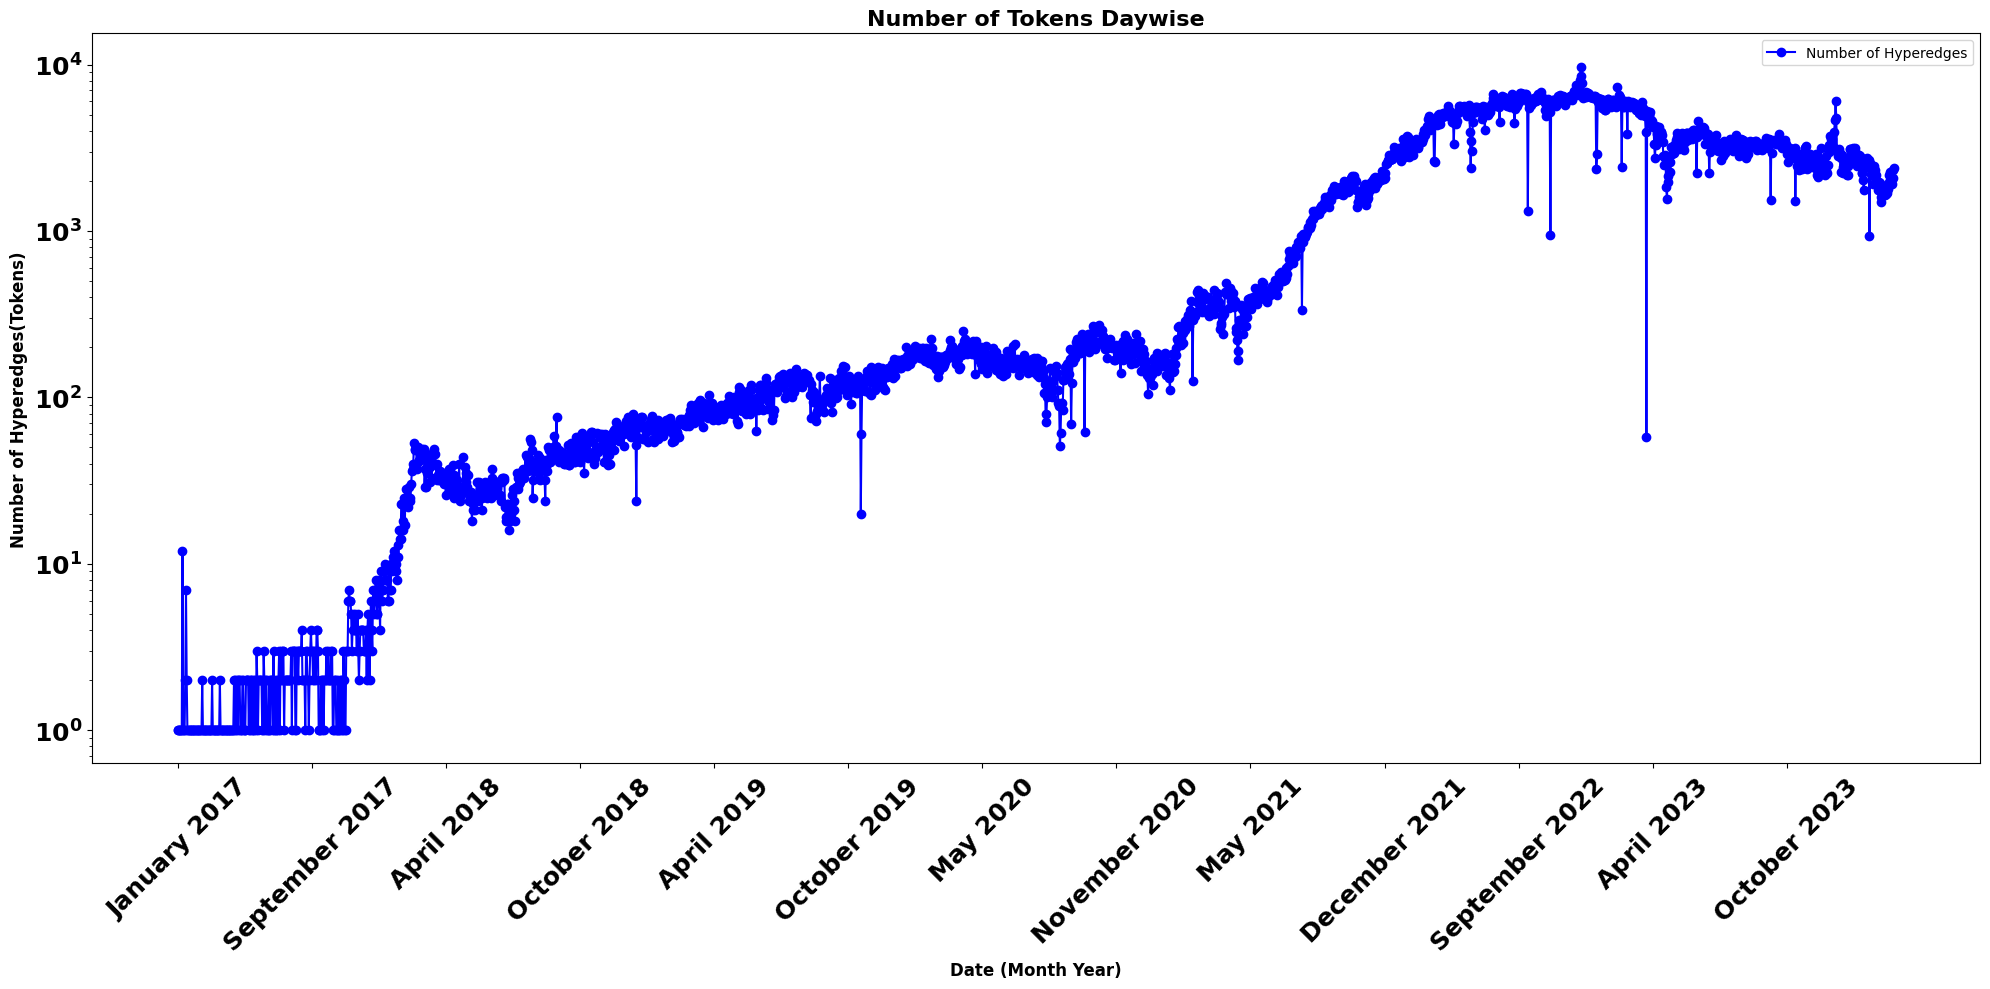

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
file_path = r'D:\Desktop\SEM 7\MINI_2_2017\new_csv_data_2017\Tokem_count_per_day_2017.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Print column names to verify
print(df.columns)

# Assuming the column name is correct
# Replace 'Number of Tranactions' with the correct column name if different
total_edges_column_name = 'Number of Edges'  # Update this if the column name is different
total_edges = df[total_edges_column_name].sum()
print(f"Total Number of Hyperedges: {total_edges}")

# Convert the 'Day' column to datetime format for proper handling
df['Date'] = pd.to_datetime(df['Date'])

# Sort data by the 'Day' column
df.sort_values(by='Date', inplace=True)

# Create a new index based on the number of days since the first date for plotting
days_index = np.arange(len(df))  # Index based on the length of the data

# Plotting the line graph
plt.figure(figsize=(20, 10))  # Set figure size
plt.plot(days_index, df[total_edges_column_name].values, marker='o', linestyle='-', color='b', label='Number of Hyperedges')

# Set x-axis labels every 190 days
step_size = 190  # Set the step size for x-axis labels
selected_indices = list(range(0, len(df), step_size))  # Select indices spaced by step_size

# Set x-axis ticks and labels with month and year in bold
plt.xticks(
    ticks=selected_indices,
    labels=df['Date'].dt.strftime('%B %Y').iloc[selected_indices],  # Format the date as 'Month Year'
    rotation=45,
    fontsize=18,
    fontweight='bold'  # Set the font to bold
)

plt.yticks(
    fontweight='bold',
    fontsize=18
)

# Set labels and title
plt.xlabel('Date (Month Year)', fontsize=12, fontweight='bold')
plt.ylabel('Number of Hyperedges(Tokens)', fontsize=12, fontweight='bold')
plt.title('Number of Tokens Daywise', fontsize=16, fontweight='bold')

# Set y-axis scale to logarithmic
plt.yscale('log')

# Disable grid
plt.grid(False)

# Add a legend
plt.legend()

# Adjust the layout to avoid label overlap
plt.tight_layout()

# Show the plot
plt.show()


Index(['Date', 'New Edges Added'], dtype='object')
New Tokens Added: 213207


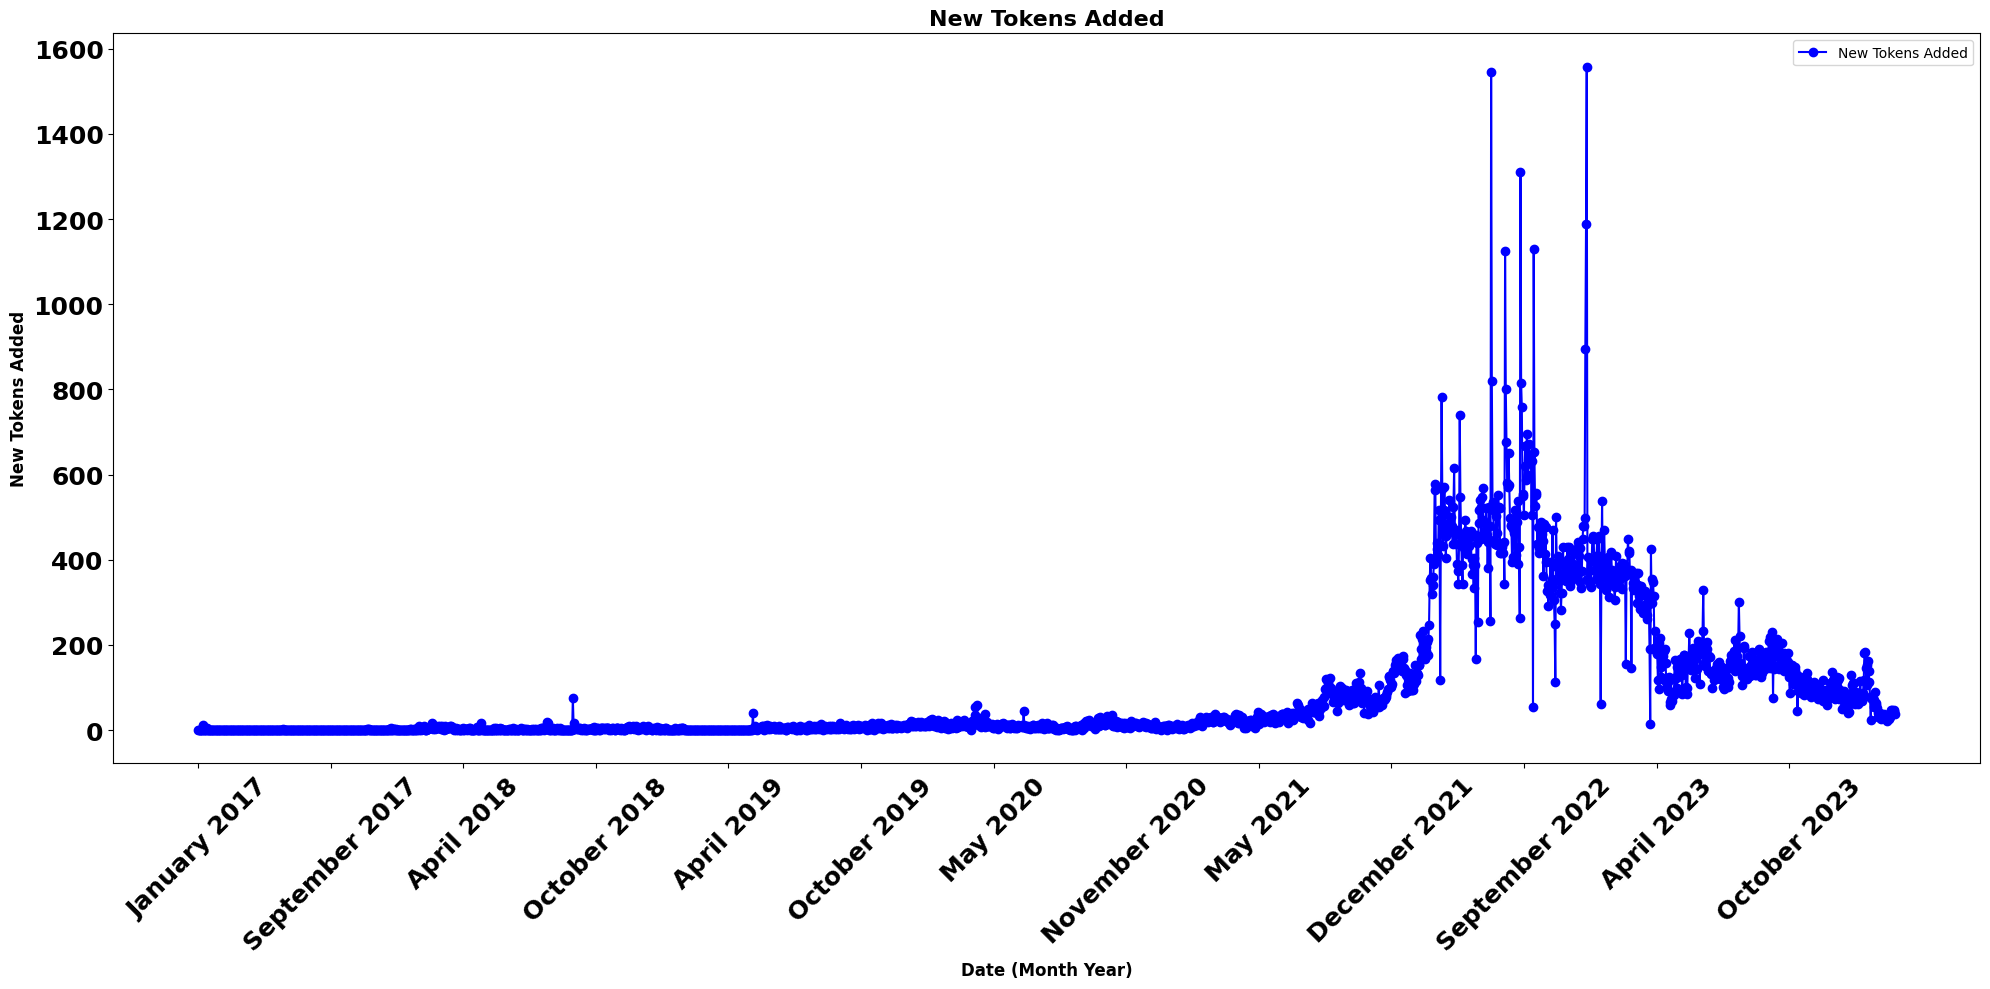

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
file_path = r'D:\Desktop\SEM 7\MINI_2_2017\new_csv_data_2017\new_tokens_count_per_day_2017.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Print column names to verify
print(df.columns)

# Assuming the column name is correct
# Replace 'Number of Tranactions' with the correct column name if different
total_edges_column_name = 'New Edges Added'  # Update this if the column name is different
total_edges = df[total_edges_column_name].sum()
print(f"New Tokens Added: {total_edges}")

# Convert the 'Day' column to datetime format for proper handling
df['Date'] = pd.to_datetime(df['Date'])

# Sort data by the 'Day' column
df.sort_values(by='Date', inplace=True)

# Create a new index based on the number of days since the first date for plotting
days_index = np.arange(len(df))  # Index based on the length of the data

# Plotting the line graph
plt.figure(figsize=(20, 10))  # Set figure size
plt.plot(days_index, df[total_edges_column_name].values, marker='o', linestyle='-', color='b', label='New Tokens Added')

# Set x-axis labels every 190 days
step_size = 190  # Set the step size for x-axis labels
selected_indices = list(range(0, len(df), step_size))  # Select indices spaced by step_size

# Set x-axis ticks and labels with month and year in bold
plt.xticks(
    ticks=selected_indices,
    labels=df['Date'].dt.strftime('%B %Y').iloc[selected_indices],  # Format the date as 'Month Year'
    rotation=45,
    fontsize=18,
    fontweight='bold'  # Set the font to bold
)

plt.yticks(
    fontweight='bold',
    fontsize=18
)

# Set labels and title
plt.xlabel('Date (Month Year)', fontsize=12, fontweight='bold')
plt.ylabel('New Tokens Added', fontsize=12, fontweight='bold')
plt.title('New Tokens Added', fontsize=16, fontweight='bold')

# Set y-axis scale to logarithmic
# plt.yscale('log')

# Disable grid
plt.grid(False)

# Add a legend
plt.legend()

# Adjust the layout to avoid label overlap
plt.tight_layout()

# Show the plot
plt.show()
